# DATA VISUALIZATION WITH PYTHON
# A Kickstarter Data Set Project
## Individual Project

Mapeishi Dai

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [280]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.plotly as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
pd.set_option('precision', 2) # show only two decimal digits
sns.set_context('poster')

from PIL import Image
from wordcloud import WordCloud
import re

import numpy as np
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Table of Contents:
#### - Dataset Discription:
    1. Primary Dataset
    2. Map Location Dataset <br>
#### - Dataset Cleaning:
    1. Only keep certain columns for analysis - df
    2. Only keep certain columns for analysis and rename columns- country_code
    3. Generate Launch Year and Deadline Year and Duration
    4. Delete Outliers
#### - Visualizations
    Set up:
        Color Palette used for this project
        Convert tick numbers into Ks instead of 1000s
        Condition on percentages shown for piechart
        
    1. Overall Category-wise Distribution
    
    2. 'Number of Projects Seeking Funds Each Year' - Stacked Bar
    
    3. Wordcloud of Project Categories
        3.1 Wordcloud of Main Project Categories
        3.2 Wordcloud of Detailed Project categories
        
    4. Proportion of Project by Status
        4.1 Over-all projects
        4.2 Percentage of States for each main category
        
    5. World Choropleth Map

# Dataset Discription

#### 1. Primary Dataset -- 'ks-projects-201801'

- Dataset: Kickstarter Projects 201801 <br>
- Date Created:Unknown <br>
- Date Updated: January 2018 <br>
- Intro: Data are collected from Kickstarter Platform by Mickaël Mouillé, and downloaded from
https://www.kaggle.com/kemical/kickstarter-projects <br>
- Data Size: 378661 entries x 15 columns <br>

In [3]:
df = pd.read_csv('ks-projects-201801.csv') #read in data

#### 2. Map Location Dataset -- 'country_code.csv'

In [4]:
df_code = pd.read_csv('country-codes.csv') # read in data

# Data Cleaning

#### 1. Only keep certain columns for analysis - df

In [5]:
df = df[['ID', 'name', 'category', 'main_category', 'deadline', 
         'launched', 'state', 'backers', 'country', 'usd pledged', 'usd_goal_real']]
# keep only columns needed for analysis

#### 2. Only keep certain columns for analysis and rename columns- country_code

In [6]:
df_code = df_code[['ISO3166-1-Alpha-3','ISO3166-1-Alpha-2']] # keep only columns needed for analysis

In [7]:
df_code.columns = ['ISOA3', 'country'] # rename columns

#### 3. Generate Launch Year and Deadline Year and Duration

In [8]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
# convert to datetime format

In [9]:
df['deadline_year'] = df['deadline'].dt.year
df['launch_year'] = df['launched'].dt.year
# get the year from datetime

In [10]:
df['duration'] = df['deadline'].dt.date - df['launched'].dt.date 
#calculate the duration between project launch and deadline

#### 4. Delete Outliers

In [11]:
# Projects with launch year of 1970 must have data entry errors, delete these projects
df = df.drop(df[df['launch_year'] == 1970].index)

# Visualizations

### Set Up

#### Color Palette used for this project

In [426]:
colors = [ '#BBB193','#88CED7', '#C1D8BF', '#E9E2AB', '#F77C11', 
          '#1C6B89', '#3A405A', '#AEC5EB', '#F9DEC9','#E9AFA3', 
          '#685044', '#9D652A', '#E8EDE4', '#3BAF8D','#28536B', 
          '#C2948A', '#7EA8BE', '#F6F0ED']

#### Convert tick numbers into Ks instead of 1000s

In [427]:
# convert y-tick numbers into Ks instead of 1000s
def y_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '{0:.0f}k'.format(val)
    else:
        return tick_val

In [263]:
# convert x-tick numbers into Ks instead of 1000s
def x_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '{0:.0f}k'.format(val)
    else:
        return tick_val

#### Condition on percentages shown for piechart

In [435]:
# show percentage > 10%
def my_autopct_ten(pct):
    if pct > 10:
        return ('%.2f' % pct + '%')
    else:
        return ''

In [434]:
# dont show percentage
# show percentage > 100%
def my_autopct_noshow(pct):
    if pct > 100:
        return ('%.2f' % pct + '%')
    else:
        return ''

#### 1. Overall Category-wise Distribution

In [12]:
df.groupby('main_category').size().sort_values()

main_category
Dance            3768
Journalism       4755
Crafts           8809
Photography     10779
Comics          10819
Theater         10912
Fashion         22816
Food            24602
Art             28152
Design          30069
Technology      32569
Games           35231
Publishing      39873
Music           51917
Film & Video    63583
dtype: int64

Text(0.5,1.03,'Overall Category-wise Distribution')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text xticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

Text(0.5,0,'Count of Projects')

Text(0,0.5,'Category')

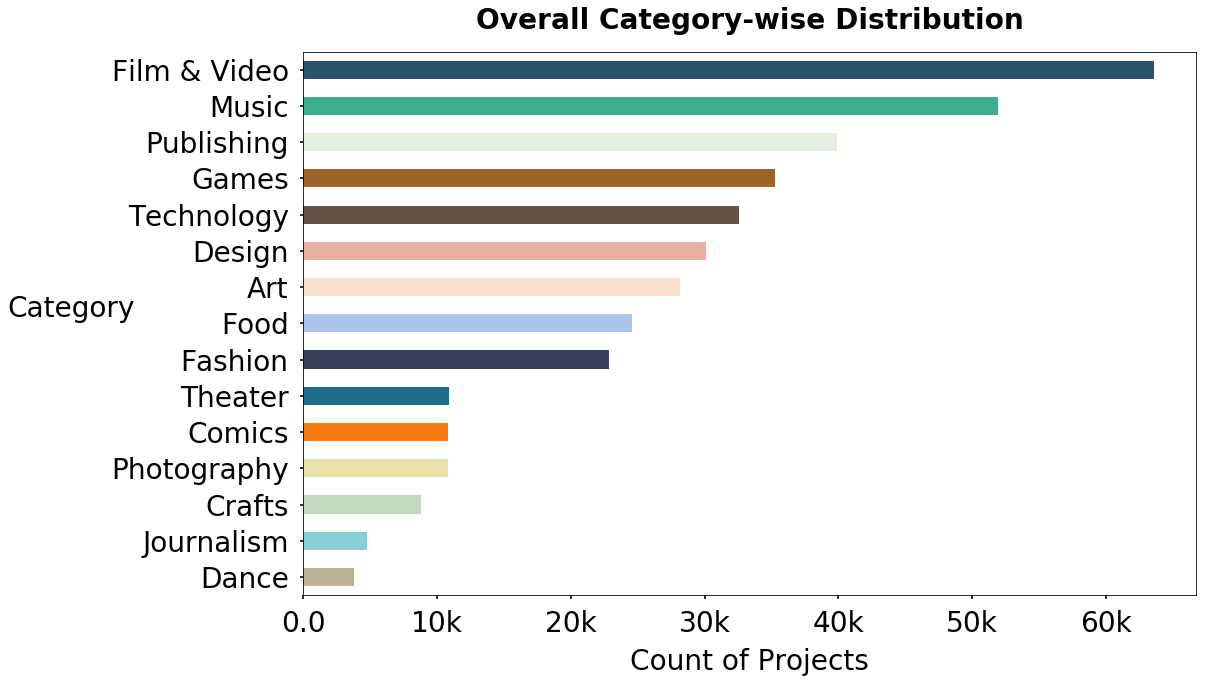

In [436]:
with sns.color_palette(colors):
    plt.figure(figsize=(16, 10))
    df.groupby('main_category').size().sort_values(ascending = True).plot.barh()
    plt.title('Overall Category-wise Distribution', y=1.03, fontsize = 28, fontweight='bold')
    plt.xticks(rotation=0, fontsize=28)
    plt.yticks(fontsize=28)
    plt.xlabel('Count of Projects', labelpad=10, fontsize=28)
    plt.ylabel('Category',rotation=0, labelpad=40, fontsize=28)
    
    ax = plt.gca()
    ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt));

#### 2. 'Number of Projects Seeking Funds Each Year' - Stacked Bar

In [437]:
df_stkbar = df[['launch_year','main_category']]
#frequency of projects of each state in each year
df_stkbar_ct1 = pd.crosstab(df_bar.launch_year,df_bar.main_category) #crosstab with count values
df_stkbar_ct1

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
launch_year,,,,,,,,,,,,,,,
2009,169,23,11,8,31,26,329,32,46,41,295,73,129,60,56
2010,856,266,55,169,166,173,3685,258,234,188,2466,466,705,225,607
2011,2340,590,117,413,903,603,8003,628,801,170,6615,870,2256,457,1471
2012,3433,1165,316,510,1841,1647,9398,1810,2782,278,8860,1184,5349,813,1779
2013,3440,1396,483,541,3246,2410,9535,2259,4090,209,6900,1239,5802,1826,1475
2014,5044,1582,1922,704,5394,4341,9956,6462,6008,930,7552,2376,7215,6456,1803
2015,5321,1922,2587,623,6705,5277,10202,6162,7418,1472,8550,2190,7482,9705,1684
2016,3581,1870,1773,430,5908,4123,6952,3794,6942,840,5804,1340,5665,7030,1132
2017,3950,2002,1542,370,5866,4210,5513,3192,6893,623,4857,1039,5254,5986,903


Text(0.5,1.03,'Number of Projects Seeking Funds Each Year By Category')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text yticklabel objects>)

Text(0.5,0,'Year')

Text(0,0.5,'Counts')

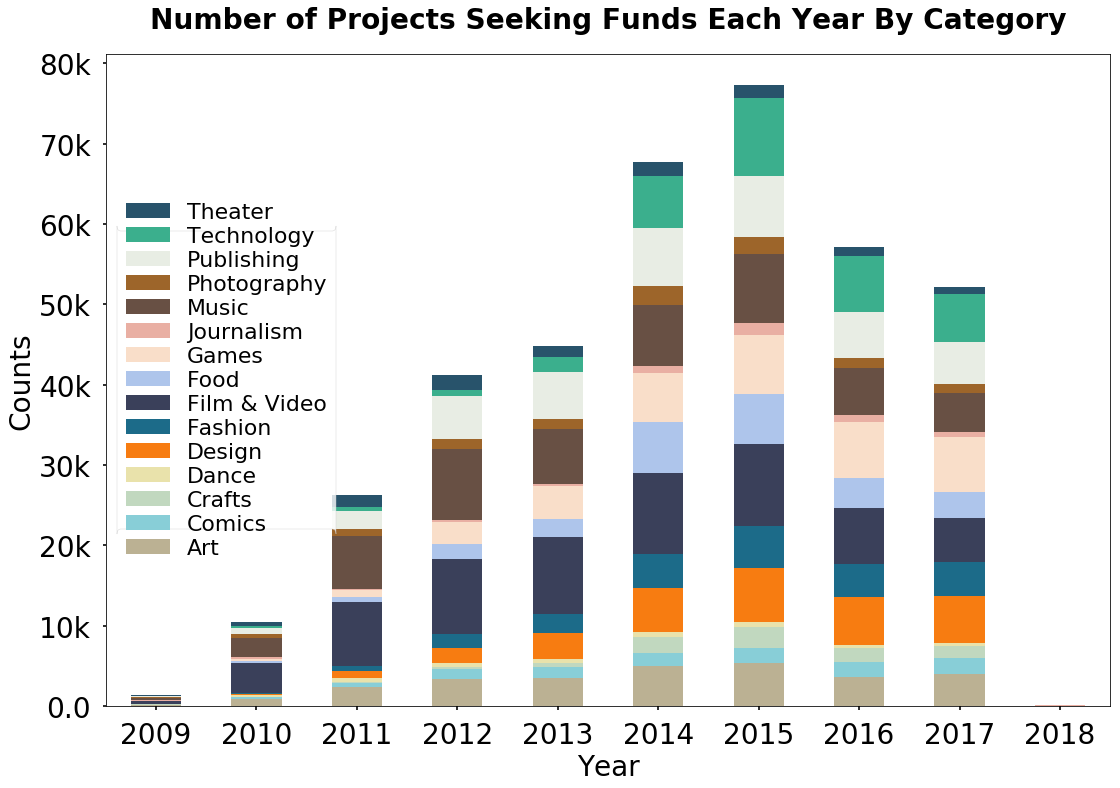

In [461]:
with sns.color_palette(colors):
    dataset = df_stkbar_ct1
    dataset.plot(kind = 'bar', figsize = (18,12), stacked=True)
    plt.title('Number of Projects Seeking Funds Each Year By Category', y = 1.03, fontsize = 28, fontweight='bold')
    plt.xticks(rotation=0, fontsize=28)
    plt.yticks(fontsize=28)
    plt.xlabel('Year',fontsize=28)
    plt.ylabel('Counts', fontsize=28)
    plt.legend(loc='center left', fontsize = 22, labelspacing=-2)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt));

#### Insights:
1. Film & Video has always been a popular category.
2. Dramatic increase in Technology in 2014&2015.
3. Overall project counts boost in 2014&2015.
4. Overall project counts decreased in 2016.

### 3. Wordcloud of Project Categories

#### 3.1 Wordcloud of Main Project Categories

In [297]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [298]:
df['main_category'].nunique() #projects are divided into 159 categories

15

In [299]:
maincategoryInfo = df['main_category'] #selecting the column with project category information

In [300]:
df['main_category'].head()

0      Publishing
1    Film & Video
2    Film & Video
3           Music
4    Film & Video
Name: main_category, dtype: object

In [301]:
projectMainCategoryList = []
i = 0
j = 0

#while i < (len(categoryInfo)-1):
while i < (10):
    #print(type (foodItemsInfo[i]))
    if type(maincategoryInfo[j]) == str:
        temp = maincategoryInfo[j]
        print (temp)
        j = j+1
        projectMainCategoryList.extend(temp)
    i = i+1
    
projectMainCategoryList_withFreq = np.unique(projectMainCategoryList,return_counts=True) #count frequency of each food item

Publishing
Film & Video
Film & Video
Music
Film & Video
Food
Food
Food
Design
Film & Video


In [302]:
dict_project_main_category_counts = {}

for phrase in maincategoryInfo:
    if phrase in dict_project_main_category_counts:
        dict_project_main_category_counts[phrase] += 1
    else:
        dict_project_main_category_counts[phrase] = 1

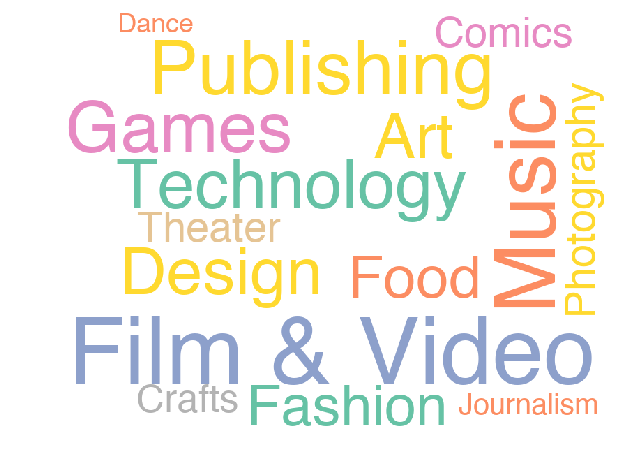

In [331]:
wc = WordCloud(background_color='white', width=800, height=600, min_font_size=9, font_path='Helvetica', colormap='Set2')
wc.generate_from_frequencies(dict_project_main_category_counts);
wc.words_
plt.figure(figsize=(10, 10))
plt.axis("off") #delete x & y axis
plt.imshow(wc);

#### 3.2 Wordcloud of Detailed Project categories

In [14]:
df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [15]:
df['category'].nunique() #projects are divided into 159 categories

159

In [16]:
categoryInfo = df['category'] #selecting the column with project category information

In [17]:
df['category'].head()

0            Poetry
1    Narrative Film
2    Narrative Film
3             Music
4      Film & Video
Name: category, dtype: object

In [18]:
projectCategoryList = []
i = 0
j = 0

#while i < (len(categoryInfo)-1):
while i < (10):
    #print(type (foodItemsInfo[i]))
    if type(categoryInfo[j]) == str:
        temp = categoryInfo[j]
        print (temp)
        j = j+1
        projectCategoryList.extend(temp)
    i = i+1
    
projectCategoryList_withFreq = np.unique(projectCategoryList,return_counts=True) #count frequency of each food item

Poetry
Narrative Film
Narrative Film
Music
Film & Video
Restaurants
Food
Drinks
Product Design
Documentary


In [19]:
dict_project_category_counts = {}

for phrase in categoryInfo:
    if phrase in dict_project_category_counts:
        dict_project_category_counts[phrase] += 1
    else:
        dict_project_category_counts[phrase] = 1
        
#dict_project_category_counts

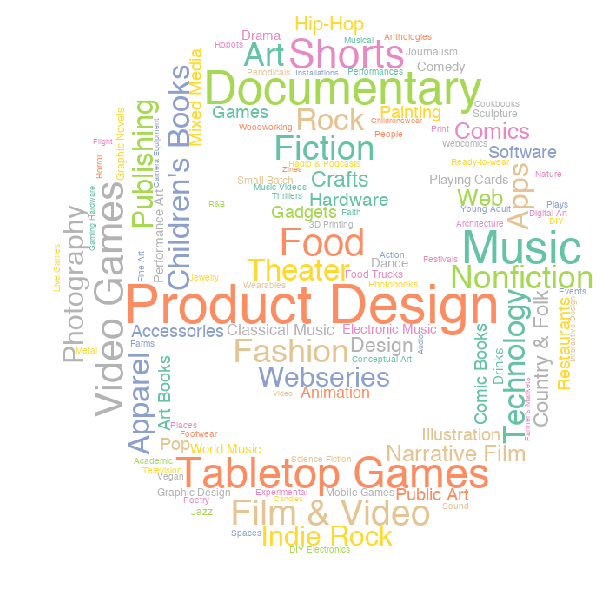

In [334]:
mask = np.array(Image.open("smile.jpg"))
wc = WordCloud(mask=mask, background_color='white', width=800, height=600, min_font_size=9, font_path='Helvetica', colormap='Set2')
wc.generate_from_frequencies(dict_project_category_counts);
wc.words_
plt.figure(figsize=(10, 10))
plt.axis("off") #delete x & y axis
plt.imshow(wc);

### 4. Proportion of Project by Status

#### 4.1 Over-all projects

Text(0,0.5,'')

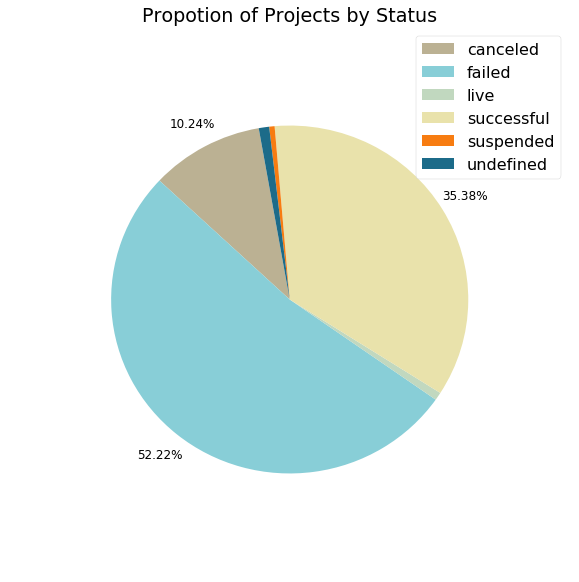

In [462]:
with sns.color_palette(colors):
    ax=df.groupby('state').size().plot(kind='pie', labels=None,
            legend=True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='Propotion of Projects by Status')
    ax.set_ylabel('');

#### 4.2 Percentage of States for each main category

In [192]:
df_mc_1p = df.loc[df['main_category'] == 'Publishing']
df_mc_2fv = df.loc[df['main_category'] == 'Film & Video']
df_mc_3m = df.loc[df['main_category'] == 'Music']
df_mc_4f = df.loc[df['main_category'] == 'Food']
df_mc_5d = df.loc[df['main_category'] == 'Design']
df_mc_6c = df.loc[df['main_category'] == 'Crafts']
df_mc_7g = df.loc[df['main_category'] == 'Games']
df_mc_8c = df.loc[df['main_category'] == 'Comics']
df_mc_9f = df.loc[df['main_category'] == 'Fashion']
df_mc_10t = df.loc[df['main_category'] == 'Theater']
df_mc_11a = df.loc[df['main_category'] == 'Art']
df_mc_12p = df.loc[df['main_category'] == 'Photography']
df_mc_13t = df.loc[df['main_category'] == 'Technology']
df_mc_14d = df.loc[df['main_category'] == 'Dance']
df_mc_15j = df.loc[df['main_category'] == 'Journalism']

Text(0,0.5,'')

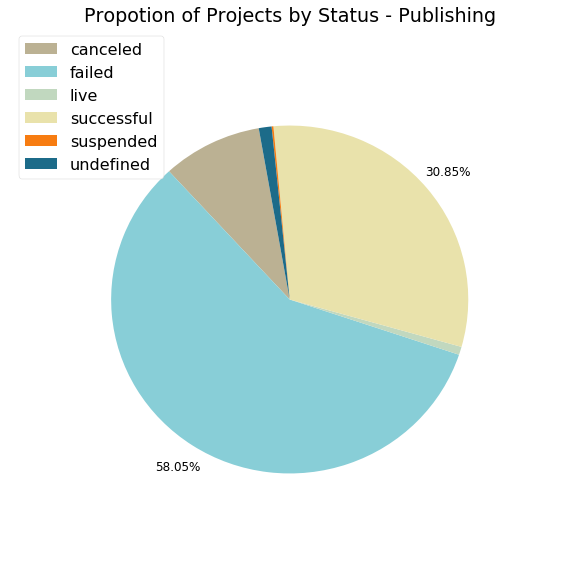

In [439]:
with sns.color_palette(colors):
    ax=df_mc_1p.groupby('state').size().plot(kind='pie', labels=None,
            legend=True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='Propotion of Projects by Status - Publishing')
    ax.set_ylabel('');

Text(0,0.5,'')

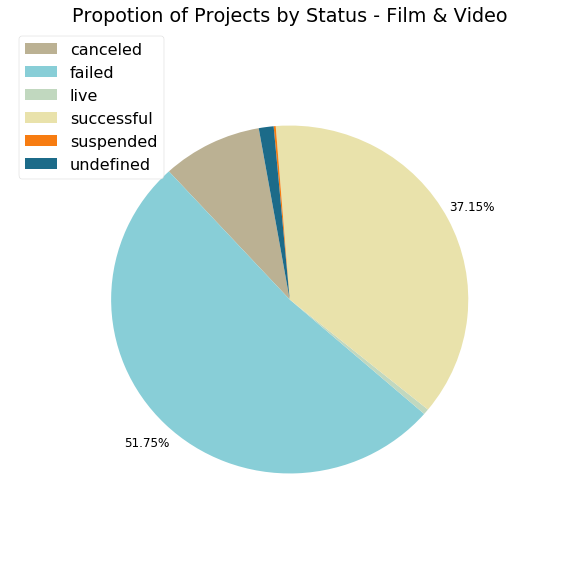

In [440]:
with sns.color_palette(colors):
    ax=df_mc_2fv.groupby('state').size().plot(kind='pie', labels=None,
            legend=True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='Propotion of Projects by Status - Film & Video')
    ax.set_ylabel('');

Text(0,0.5,'')

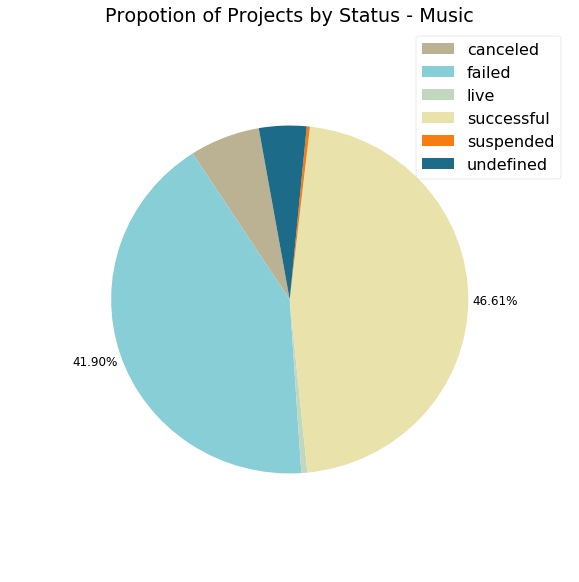

In [441]:
with sns.color_palette(colors):
    ax=df_mc_3m.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Music')
    ax.set_ylabel('');

Text(0,0.5,'')

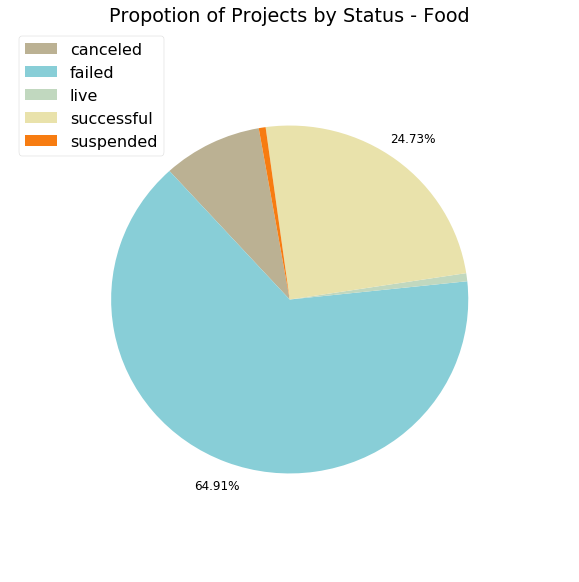

In [442]:
with sns.color_palette(colors):
    ax=df_mc_4f.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Food')
    ax.set_ylabel('');

Text(0,0.5,'')

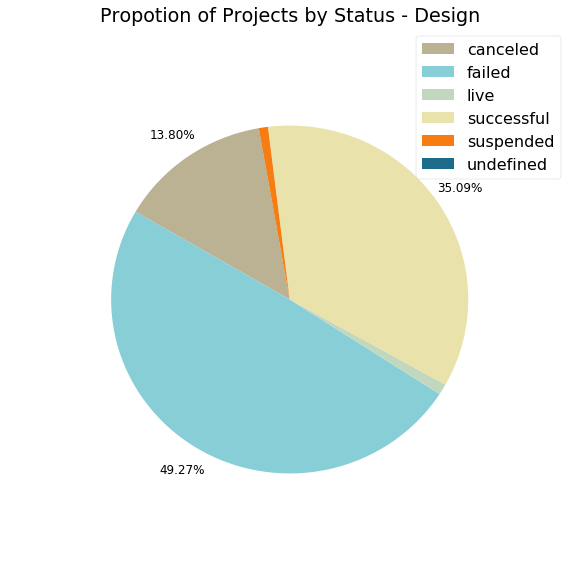

In [443]:
with sns.color_palette(colors):
    ax=df_mc_5d.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Design')
    ax.set_ylabel('');

Text(0,0.5,'')

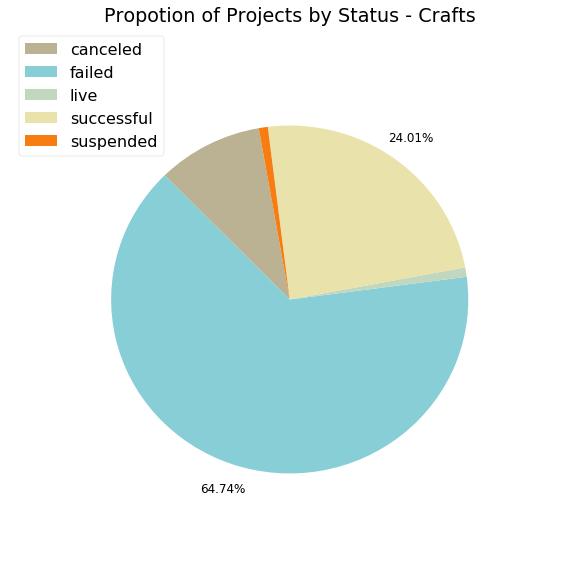

In [444]:
with sns.color_palette(colors):
    ax=df_mc_6c.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Crafts')
    ax.set_ylabel('');

Text(0,0.5,'')

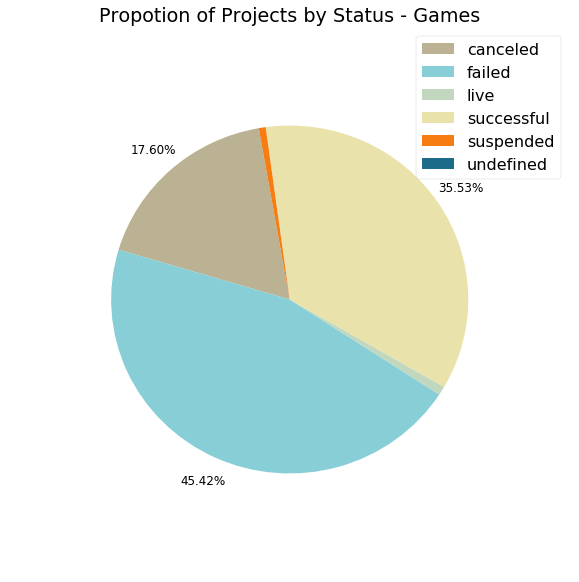

In [445]:
with sns.color_palette(colors):
    ax=df_mc_7g.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Games')
    ax.set_ylabel('');

Text(0,0.5,'')

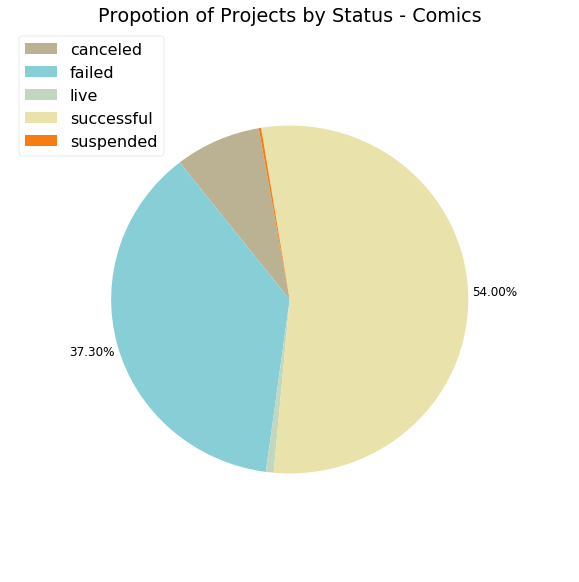

In [446]:
with sns.color_palette(colors):
    ax=df_mc_8c.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Comics')
    ax.set_ylabel('');

Text(0,0.5,'')

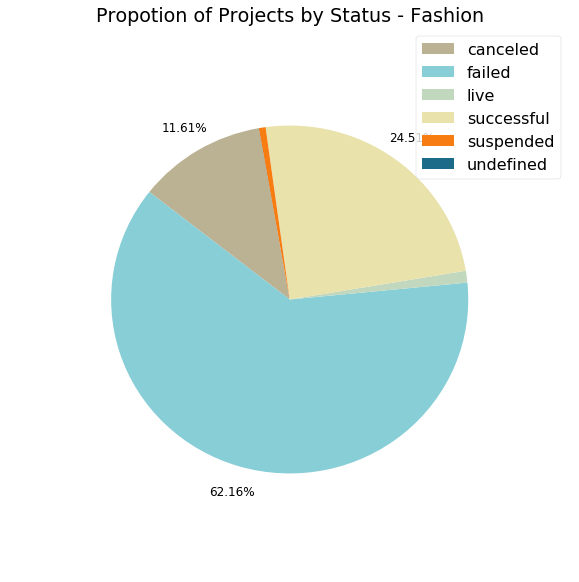

In [447]:
with sns.color_palette(colors):
    ax=df_mc_9f.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Fashion')
    ax.set_ylabel('');

Text(0,0.5,'')

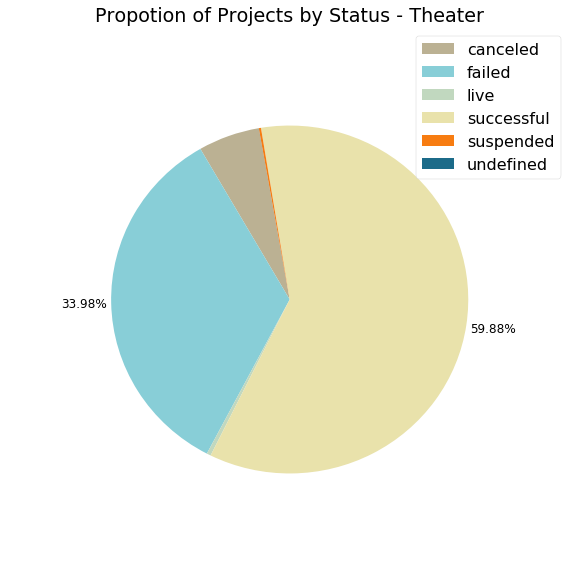

In [448]:
with sns.color_palette(colors):
    ax=df_mc_10t.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Theater')
    ax.set_ylabel('');

Text(0,0.5,'')

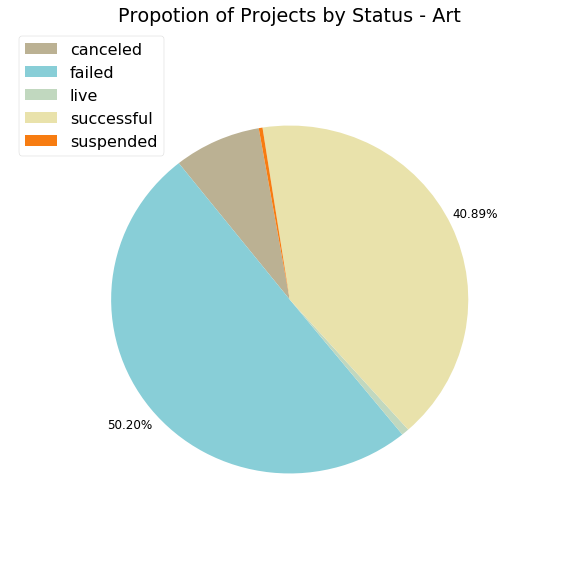

In [449]:
with sns.color_palette(colors):
    ax=df_mc_11a.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Art')
    ax.set_ylabel('');

Text(0,0.5,'')

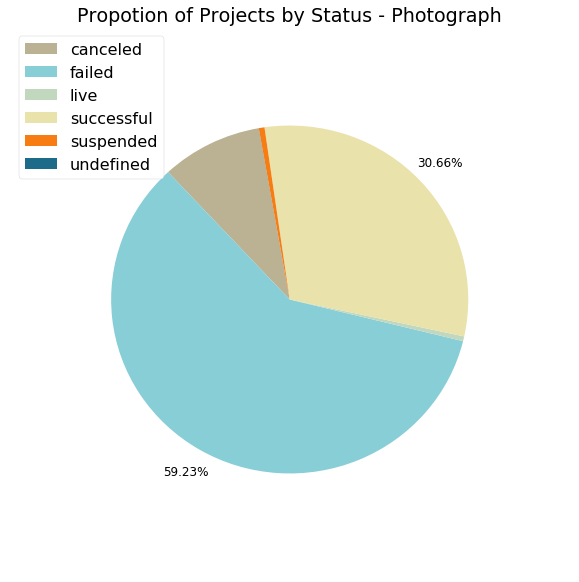

In [450]:
with sns.color_palette(colors):
    ax=df_mc_12p.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Photograph')
    ax.set_ylabel('');

Text(0,0.5,'')

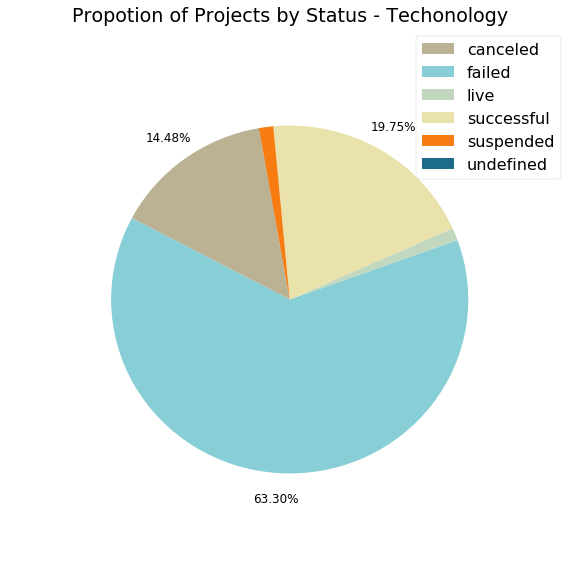

In [451]:
with sns.color_palette(colors):
    ax=df_mc_13t.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Techonology')
    ax.set_ylabel('');

Text(0,0.5,'')

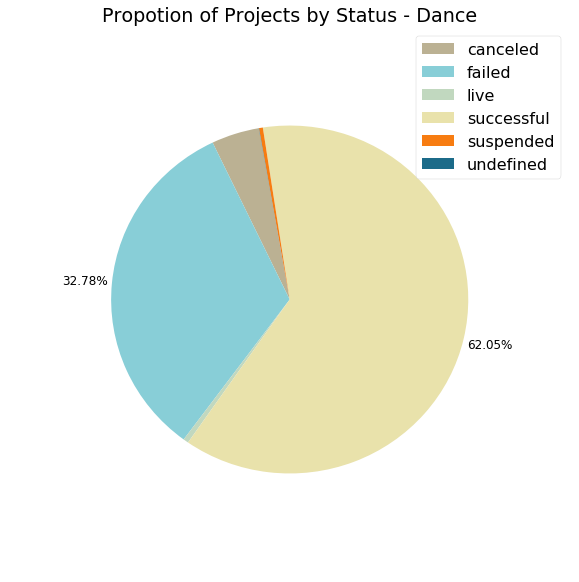

In [452]:
with sns.color_palette(colors):
    ax=df_mc_14d.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Dance')
    ax.set_ylabel('');

Text(0,0.5,'')

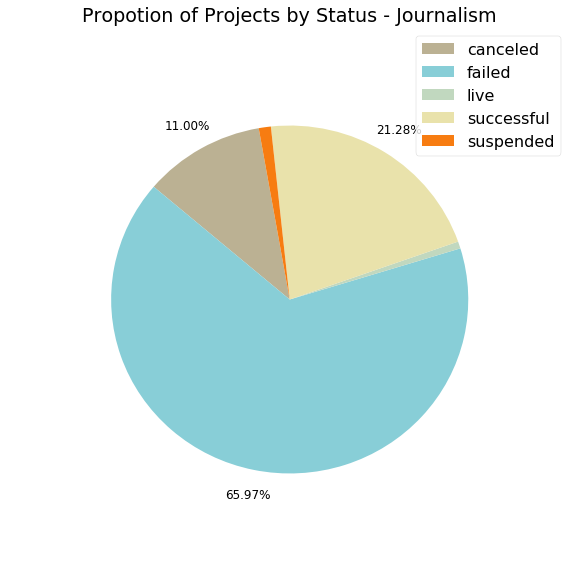

In [453]:
with sns.color_palette(colors):
    ax=df_mc_15j.groupby('state').size().plot(kind='pie', labels=None,
        legend = True, pctdistance=1.15, figsize=(10,10), autopct=my_autopct_ten, shadow=False, radius=0.8,  
        fontsize=12, startangle=100, title='Propotion of Projects by Status - Journalism')
    ax.set_ylabel('');

Text(0.5,0.98,'Proportion of Project Status by Category')

Text(0,0.5,'')

(-0.8882220717252042,
 0.8903927037101599,
 -0.8897314595463056,
 0.8893859392687947)

Text(0,0.5,'')

(-0.8821937372887432,
 0.8924207659470684,
 -0.884393571894743,
 0.8905113736107765)

Text(0,0.5,'')

(-0.8959261896090097,
 0.8822404775555399,
 -0.8903829450818839,
 0.8813319000506425)

Text(0,0.5,'')

(-0.8925170619442446,
 0.8909977667661324,
 -0.8930032369051013,
 0.9026202307639959)

Text(0,0.5,'')

(-0.9083837078877757,
 0.8868661445052755,
 -0.9082855037832006,
 0.893998530176616)

Text(0,0.5,'')

(-0.8914505530626935,
 0.8920253523984654,
 -0.8930287496541403,
 0.9004635199445614)

Text(0,0.5,'')

(-0.9028591591334776,
 0.885621170045427,
 -0.9037378800052286,
 0.8946304534904584)

Text(0,0.5,'')

(-0.8941504497764429,
 0.8843743169554766,
 -0.8877053687913539,
 0.8885887232814083)

Text(0,0.5,'')

(-0.891492840402636,
 0.8899046057671851,
 -0.8914614966764103,
 0.9023014520445327)

Text(0,0.5,'')

(-0.8834359251576341,
 0.89046736308261,
 -0.8819501880002387,
 0.8904081777327804)

Text(0,0.5,'')

(-0.8880353307894451,
 0.8996507833053997,
 -0.8878501793195135,
 0.8981651090271364)

Text(0,0.5,'')

(-0.8896980395839227,
 0.8900638716364925,
 -0.8873476293841148,
 0.8910462763838365)

Text(0,0.5,'')

(-0.8819685393921626,
 0.891519355223052,
 -0.8882319983297426,
 0.8929180056190201)

Text(0,0.5,'')

(-0.8903893066769186,
 0.8897660106050543,
 -0.8908487129210756,
 0.8915621109684078)

Text(0,0.5,'')

(-0.8930301734522736,
 0.8921959314076371,
 -0.8928802138429638,
 0.895836407523485)

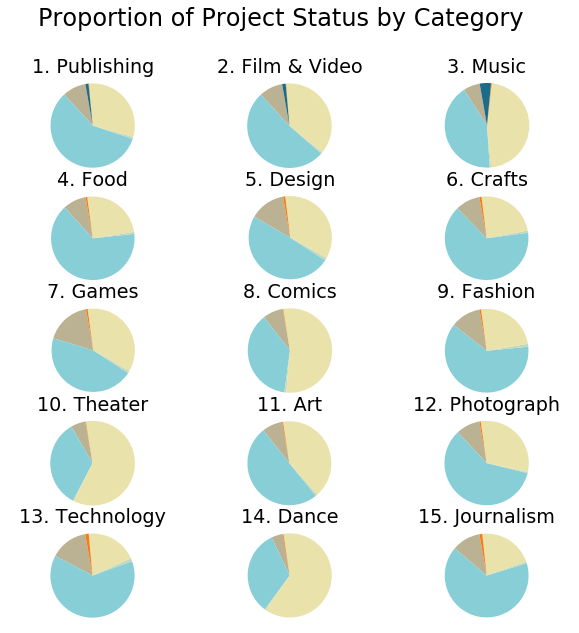

In [460]:
#figsize = (15,25)
figsize = (50,50)
plt.suptitle('Proportion of Project Status by Category', fontsize=24)

plt.subplot(5,3,1)
with sns.color_palette(colors):
    ax=df_mc_1p.groupby('state').size().plot(kind='pie', labels=None,
        pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
        fontsize=6, startangle=100, title='1. Publishing')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,2)
with sns.color_palette(colors):
    ax=df_mc_2fv.groupby('state').size().plot(kind='pie', labels=None,
        pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
        fontsize=6, startangle=100, title='2. Film & Video')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,3)
with sns.color_palette(colors):
    ax=df_mc_3m.groupby('state').size().plot(kind='pie', labels=None,
        pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
        fontsize=6, startangle=100, title='3. Music')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,4)
with sns.color_palette(colors):
    ax=df_mc_4f.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=6, startangle=100, title='4. Food')
    ax.set_ylabel('')
    plt.axis('equal');
    
plt.subplot(5,3,5)
with sns.color_palette(colors):
    ax=df_mc_5d.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=6, startangle=100, title='5. Design')
    ax.set_ylabel('')
    plt.axis('equal');
    
plt.subplot(5,3,6)
with sns.color_palette(colors):
    ax=df_mc_6c.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=6, startangle=100, title='6. Crafts')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,7)
with sns.color_palette(colors):
    ax=df_mc_7g.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=6, startangle=100, title='7. Games')
    ax.set_ylabel('')
    plt.axis('equal');
    
plt.subplot(5,3,8)
with sns.color_palette(colors):
    ax=df_mc_8c.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=6, startangle=100, title='8. Comics')
    ax.set_ylabel('')
    plt.axis('equal');    
    
plt.subplot(5,3,9)
with sns.color_palette(colors):
    ax=df_mc_9f.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=6, startangle=100, title='9. Fashion')
    ax.set_ylabel('')
    plt.axis('equal');
    
plt.subplot(5,3,10)
with sns.color_palette(colors):
    ax=df_mc_10t.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='10. Theater')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,11)
with sns.color_palette(colors):
    ax=df_mc_11a.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='11. Art')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,12)
with sns.color_palette(colors):
    ax=df_mc_12p.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='12. Photograph')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,13)
with sns.color_palette(colors):
    ax=df_mc_13t.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='13. Technology')
    ax.set_ylabel('')
    plt.axis('equal');

plt.subplot(5,3,14)
with sns.color_palette(colors):
    ax=df_mc_14d.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize=12, startangle=100, title='14. Dance')
    ax.set_ylabel('')
    plt.axis('equal');
    
plt.subplot(5,3,15)
with sns.color_palette(colors):
    ax=df_mc_15j.groupby('state').size().plot(kind='pie', labels=None
            , pctdistance=1.15, figsize=(10,10), autopct=my_autopct_noshow, shadow=False, radius=0.8,  
            fontsize='small', startangle=100, title='15. Journalism')
    ax.set_ylabel('')
    plt.axis('equal');

plt.show()

#### Insights:
1. Most projects actually failed than successed. :(
2. Except for few categories: Comics, Theater and Dance.

#### 5. World Choropleth Map

In [22]:
df_map = pd.DataFrame()
df_map['country'] = df['country'].unique()
df_map = df.groupby(df['country']).size().reset_index(name='counts')

In [23]:
df_map = pd.merge(df_map,df_code, how='left', on=['country'])

In [160]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline
init_notebook_mode(connected=True)
tls.set_credentials_file(username='gloriadai', api_key='Js8XxZUcKGGUKyFnhJqs')

data = [ dict(
        type = 'choropleth',
        locations = df_map['ISOA3'],
        z = df_map['counts'],
        text = df_map['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Project Counts'),
      ) ]

layout = dict(
    title = 'Number of Kickstarter Projects by Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

<function cufflinks.offline.go_offline>

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gloriadai/0 or inside your plot.ly account where it is named 'd3-world-map'


#### Insights:
1. Majority fund seekers are from US. Great Britain and Canada follows.
2. Some countries are missing. China, Russia, India, etc. Might due to policy issues.